# 결정트리 (Decision Tree)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=11
)

In [3]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

### 모델 시각화

In [4]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=True, filled=True)

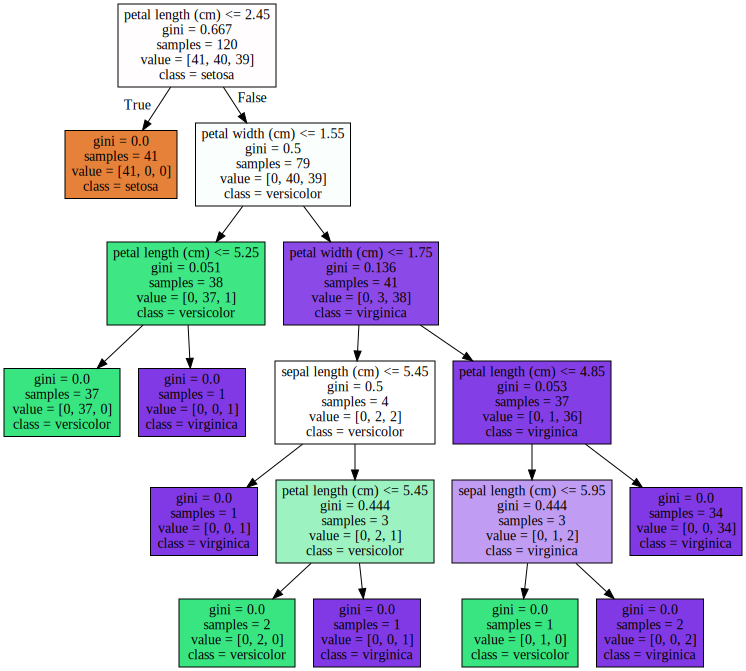

In [5]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [6]:
pred = dt_clf.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9333333333333333

### 제약조건

In [8]:
dt_clf2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

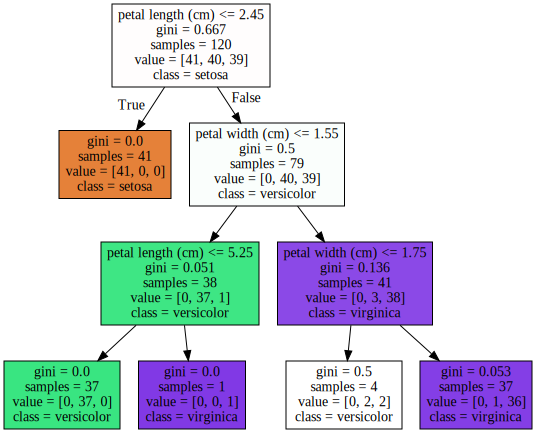

In [9]:
export_graphviz(dt_clf2, out_file="tree.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=True, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [10]:
pred2 = dt_clf2.predict(X_test)
accuracy_score(y_test, pred2)

0.9333333333333333

In [11]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dt_clf3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

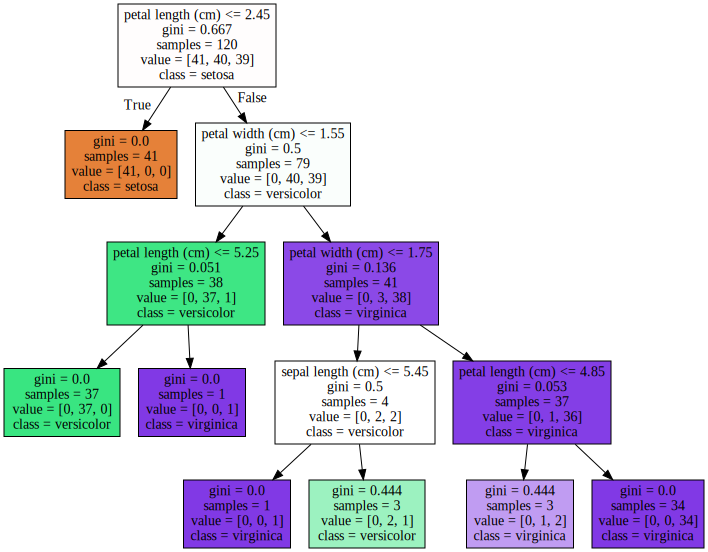

In [12]:
export_graphviz(dt_clf3, out_file="tree.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=True, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [13]:
pred3 = dt_clf3.predict(X_test)
accuracy_score(y_test, pred3)

0.9333333333333333

In [14]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dt_clf4.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

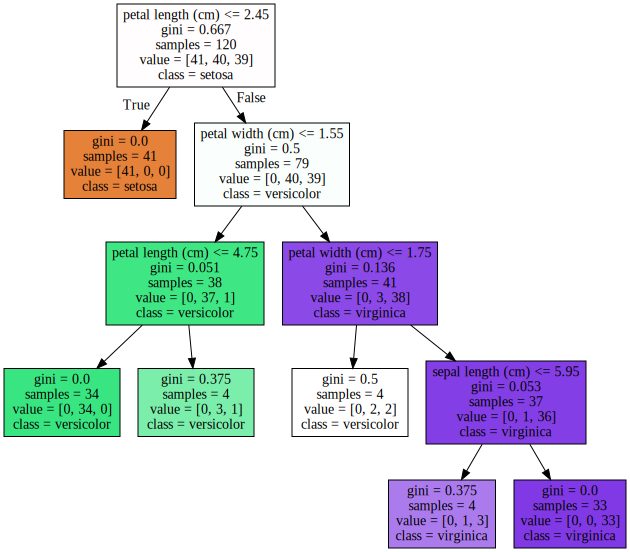

In [15]:
export_graphviz(dt_clf4, out_file="tree.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=True, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [16]:
pred4 = dt_clf4.predict(X_test)
accuracy_score(y_test, pred4)

0.9333333333333333

### Feature 중요도

In [17]:
import seaborn as sns
%matplotlib inline

In [18]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(f'{name}:{value:.4f}')

sepal length (cm):0.0250
sepal width (cm):0.0000
petal length (cm):0.5549
petal width (cm):0.4201


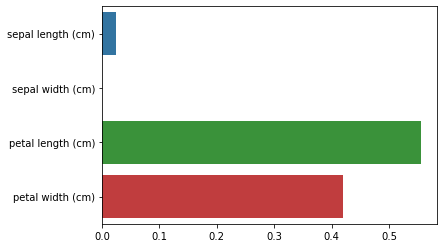

In [19]:
sns.barplot(x=dt_clf.feature_importances_, y= iris.feature_names);

In [20]:
import pandas as pd
df = pd.DataFrame({'name':iris.feature_names, '제약 무':dt_clf.feature_importances_,
                   'max_depth = 3':dt_clf2.feature_importances_, 
                   'min_samples_split = 4':dt_clf3.feature_importances_,
                   'min_samples_leaf = 4':dt_clf4.feature_importances_})
df

,name,제약 무,max_depth = 3,min_samples_split = 4,min_samples_leaf = 4
0,sepal length (cm),0.025005,0.000000,0.008623,0.005947
1,sepal width (cm),0.000000,0.000000,0.000000,0.000000
2,petal length (cm),0.554903,0.558107,0.556796,0.545948
3,petal width (cm),0.420092,0.441893,0.434581,0.448104


### 과적합

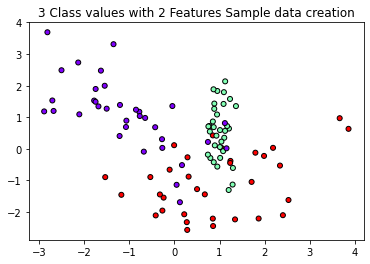

In [21]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 
# 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(
    n_features=2, n_redundant=0, n_informative=2,
    n_classes=3, n_clusters_per_class=1, random_state=0
)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25,   
            cmap='rainbow', edgecolor='k')
plt.show()

In [22]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

In [24]:
import numpy as np

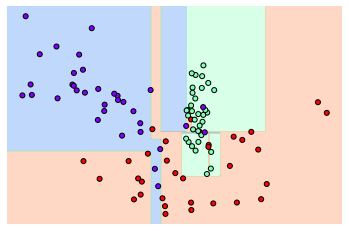

In [25]:
# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

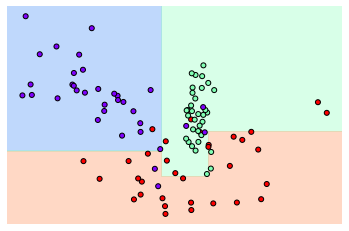

In [26]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)